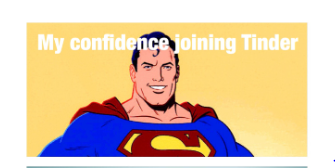

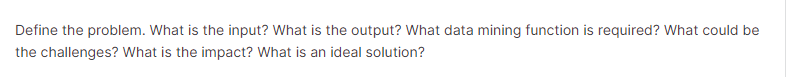

**1_Define the problem:**

The problem is to predict the outcome of a specific speed dating session based on the profile of two people, using a binary classification task. Given a data sample (information about the dating session), the task is to predict the probability (0-1, float) that the dating session will lead to a successful match. The goal is to implement a recommendation system to better match people in speed dating events.

**2_What is the input?**

The input is a dataset containing information about the speed dating sessions, including information about the participants, their interests, and the outcome of the session.

**3_What is the output?**

The output is a probability (0-1, float) that the dating session will lead to a successful match, i.e., the two participants will want to go on a second date.

**4_What data mining function is required?**

A binary classification function is required to predict the probability of a successful match. This involves training a machine learning model on the dataset, and using it to predict the outcome of new speed dating sessions.

**5_What could be the challenges?**

The dataset has a lot of missing values, so a strategy for missing value replacement has to be tuned. The dataset is also highly unbalanced, with most speed dating sessions not leading to successful matches. This can make it difficult to train a machine learning model that accurately predicts the probability of a successful match. Additionally, the model needs to be interpretable so that the recommendation system can provide actionable recommendations to improve the matching of people in speed dating events.

**6_What is the impact?** 

The impact of this project is to improve the success rate of speed dating events by better matching people based on their profiles and interests. This can lead to more successful matches, more second dates, and ultimately more successful long-term relationships.

**7_What is an ideal solution?**

An ideal solution would be a machine learning model that accurately predicts the probability of a successful match, while also being interpretable so that the recommendation system can provide actionable recommendations to improve the matching of people in speed dating events. The solution should also take into account the missing values and class imbalance in the dataset, and have a high level of generalization to new speed dating sessions.

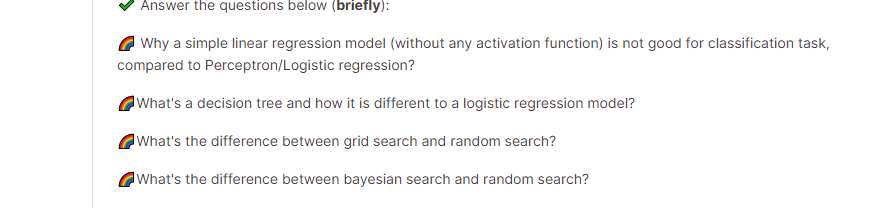

1_**A simple linear regression** model without any activation function is not suitable for classification tasks because it produces a continuous output value that cannot be interpreted as probabilities or binary classifications. Perceptron and logistic regression models, on the other hand, use an activation function to produce an output that is bounded between 0 and 1 and can be interpreted as probabilities or binary classifications. Additionally, logistic regression and perceptron models use a loss function that is specifically designed for classification tasks and penalizes incorrect classifications.

**2_A decision tree** is a machine learning algorithm that builds a tree-like model of decisions and their possible consequences. The tree consists of nodes that represent decisions based on input features and branches that represent the possible outcomes of these decisions. The tree is trained by recursively splitting the data based on the input features that best separate the outcomes. The final leaves of the tree represent the predicted outcomes of the model.

A logistic regression model, on the other hand, is a linear model that uses a logistic function to map the linear combination of input features to a probability of a binary classification. The logistic function is an S-shaped curve that maps the input values to a probability value between 0 and 1. Logistic regression models are trained by optimizing a cost function that is designed to penalize incorrect classifications.

The main difference between decision trees and logistic regression models is that decision trees are non-parametric models that do not assume a specific form for the relationship between the input features and the outcome, whereas logistic regression models are parametric models that assume a linear relationship between the input features and the outcome. Decision trees are also more interpretable than logistic regression models because they can be visualized as a tree structure that shows the decisions and their outcomes. However, decision trees can be prone to overfitting and may not generalize well to new data, whereas logistic regression models are less prone to overfitting and can be more robust to noise in the data.

**3_grid search and random search** are both methods used for hyperparameter tuning in machine learning.

Grid search involves specifying a grid of hyperparameter values to be searched exhaustively. The grid is created by specifying a range of values for each hyperparameter, and the search algorithm evaluates the model performance for every combination of hyperparameters in the grid. Grid search can be computationally expensive when the number of hyperparameters and the size of the grid are large.

Random search, on the other hand, involves randomly selecting hyperparameter values from a predefined distribution. The search algorithm evaluates the model performance for a fixed number of random combinations of hyperparameters. Random search can be more efficient than grid search when the number of hyperparameters and the size of the grid are large, as it does not require evaluating all possible combinations of hyperparameters.

The main difference between grid search and random search is the way they explore the hyperparameter space. Grid search systematically explores the hyperparameter space by evaluating every possible combination of hyperparameters, whereas random search explores the hyperparameter space randomly by evaluating only a fixed number of randomly selected combinations of hyperparameters. Grid search can be more thorough in finding the optimal hyperparameters, but it can be computationally expensive. Random search can be more efficient in finding a good set of hyperparameters, but it may not be as thorough in exploring the hyperparameter space.

**4_Bayesian search and random search** are both methods used for hyperparameter tuning in machine learning.

Random search involves randomly selecting hyperparameter values from a predefined distribution. The search algorithm evaluates the model performance for a fixed number of random combinations of hyperparameters.

Bayesian search, on the other hand, uses a probabilistic model to predict the performance of different sets of hyperparameters. The search algorithm updates the model based on the performance of each evaluated set of hyperparameters, and then selects new sets of hyperparameters that are expected to perform well based on the model predictions.

The main difference between Bayesian search and random search is the way they explore the hyperparameter space. Random search explores the hyperparameter space randomly by evaluating only a fixed number of randomly selected combinations of hyperparameters. Bayesian search explores the hyperparameter space probabilistically by modeling the relationship between hyperparameters and the model performance, and using this model to guide the search towards promising regions of the hyperparameter space.

**Import libraries**

In [29]:

import numpy as np #used for working with arrays
import pandas as pd#Pandas is mainly used for data analysis
import matplotlib.pyplot as plt#is a cross-platform, data visualization and graphical plotting library
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline #pipeline is a way to codify and automate the workflow
from sklearn.impute import SimpleImputer #Imputation transformer for completing missing values.
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Standardize features by removing the mean and scaling to unit variance.
# one hot encoding is essential process of converting the categorical to numeric
from sklearn.model_selection import train_test_split, GridSearchCV#Tuning the hyper-parameters
from xgboost.sklearn import XGBClassifier #Model binary classification
import warnings #handling warning 
warnings.filterwarnings('ignore')

 reads two CSV files, one for training data and the other for testing data

In [30]:
df1 = pd.read_csv('/kaggle/input/data-com2/train.csv')
print(df1.shape)
df2 = pd.read_csv('/kaggle/input/data-com2/test.csv')
df2['match'] = 0 
print(df2.shape)

(5909, 192)
(2469, 192)


**Concat Data**

In [31]:
#concatenating the training and testing data into a single dataframe so that the entire dataset can be processed together
all_data= pd.concat([df1,df2],ignore_index=True, sort=False)
all_data

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0          0    3       2    14     18         2       2.0     14       12   
1          1   14       1     3     10         2       NaN      8        8   
2          1   14       1    13     10         8       8.0     10       10   
3          1   38       2     9     20        18      13.0      6        7   
4          1   24       2    14     20         6       6.0     20       17   
...      ...  ...     ...   ...    ...       ...       ...    ...      ...   
8373       0   23       2    15     19        18      18.0     14       11   
8374       0    5       1    13      9         4       4.0      4        8   
8375       1   26       2     2     19         3       NaN     15        3   
8376       0   19       2     9     20        11      11.0      9        2   
8377       1   38       2    21     22        22       7.0     16        5   

        pid  ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
1      63.0  ...      8.0       8.0     7.0     8.0      NaN      NaN   
2     331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
3     200.0  ...      9.0       8.0     8.0     6.0      NaN      NaN   
4     357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
...     ...  ...      ...       ...     ...     ...      ...      ...   
8373  407.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
8374  339.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
8375   23.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
8376  215.0  ...      7.0      12.0    12.0     9.0      NaN      NaN   
8377  513.0  ...      9.0       8.0     7.0     8.0      5.0      8.0   

      intel5_3  fun5_3  amb5_3    id  
0          NaN     NaN     NaN  2583  
1          NaN     NaN     NaN  6830  
2          NaN     NaN     NaN  4840  
3          NaN     NaN     NaN  5508  
4          NaN     NaN     NaN  4828  
...        ...     ...     ...   ...  
8373       NaN     NaN     NaN  7982  
8374       NaN     NaN     NaN  7299  
8375       NaN     NaN     NaN  1818  
8376       NaN     NaN     NaN   937  
8377       8.0     6.0     8.0  6691  

[8378 rows x 192 columns]

In [32]:
all_data.dtypes # type of data 

gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
             ...   
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
id            int64
Length: 192, dtype: object

In [33]:
all_data.nunique()# unique value for all data

gender         2
idg           44
condtn         2
wave          21
round         15
            ... 
sinc5_3        9
intel5_3       7
fun5_3        10
amb5_3         9
id          8378
Length: 192, dtype: int64

In [34]:
all_data.info() #some information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 12.3+ MB


**Search about null value**

In [35]:
from numpy.ma.core import array
#this return the first 30 columns have null value 
null_val = pd.DataFrame(all_data.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(all_data.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:30]#make dataframe and calc percent of null value for each columns
     

null_val  percent_
num_in_3      7710      92.0
numdat_3      6882      82.0
expnum        6578      79.0
amb7_2        6423      77.0
sinc7_2       6423      77.0
shar2_3       6362      76.0
fun7_3        6362      76.0
intel7_3      6362      76.0
sinc7_3       6362      76.0
attr7_3       6362      76.0
shar7_2       6404      76.0
intel7_2      6394      76.0
fun7_2        6394      76.0
shar7_3       6362      76.0
attr7_2       6394      76.0
attr5_3       6362      76.0
sinc5_3       6362      76.0
intel5_3      6362      76.0
fun5_3        6362      76.0
amb5_3        6362      76.0
amb7_3        6362      76.0
amb2_3        5419      65.0
attr4_3       5419      65.0
shar4_3       5419      65.0
intel4_3      5419      65.0
fun4_3        5419      65.0
amb4_3        5419      65.0
fun2_3        5419      65.0
intel2_3      5419      65.0
sinc2_3       5419      65.0

dropping any features from the dataset that have missing values in more than 76% of the rows

In [36]:
all_data = all_data.drop([
'num_in_3',
'numdat_3',
'expnum',	
'amb7_2',	
'sinc7_2',	
'shar2_3',	
'fun7_3',	
'intel7_3',	
'sinc7_3',	
'attr7_3',	
'shar7_2',	
'intel7_2',	
'fun7_2',	
'shar7_3',	
'attr7_2',	
'attr5_3',		
'sinc5_3',	
'intel5_3',	
'fun5_3',	
'amb5_3',	
'amb7_3'
]
, axis =1) 
     

In [37]:
all_data

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0          0    3       2    14     18         2       2.0     14       12   
1          1   14       1     3     10         2       NaN      8        8   
2          1   14       1    13     10         8       8.0     10       10   
3          1   38       2     9     20        18      13.0      6        7   
4          1   24       2    14     20         6       6.0     20       17   
...      ...  ...     ...   ...    ...       ...       ...    ...      ...   
8373       0   23       2    15     19        18      18.0     14       11   
8374       0    5       1    13      9         4       4.0      4        8   
8375       1   26       2     2     19         3       NaN     15        3   
8376       0   19       2     9     20        11      11.0      9        2   
8377       1   38       2    21     22        22       7.0     16        5   

        pid  ...  sinc2_3  intel2_3  fun2_3  amb2_3  attr3_3  sinc3_3  \
0     372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
1      63.0  ...      NaN       NaN     NaN     NaN      6.0      8.0   
2     331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
3     200.0  ...      8.0       8.0     8.0     8.0      8.0      9.0   
4     357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
...     ...  ...      ...       ...     ...     ...      ...      ...   
8373  407.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
8374  339.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
8375   23.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
8376  215.0  ...      8.0       7.0     8.0     6.0      9.0      7.0   
8377  513.0  ...      0.0      20.0    20.0    10.0      7.0      9.0   

      intel3_3  fun3_3  amb3_3    id  
0          NaN     NaN     NaN  2583  
1          8.0     7.0     8.0  6830  
2          NaN     NaN     NaN  4840  
3          8.0     8.0     6.0  5508  
4          NaN     NaN     NaN  4828  
...        ...     ...     ...   ...  
8373       NaN     NaN     NaN  7982  
8374       NaN     NaN     NaN  7299  
8375       NaN     NaN     NaN  1818  
8376      12.0    12.0     9.0   937  
8377       8.0     7.0     8.0  6691  

[8378 rows x 171 columns]

analyzing the distribution of ages for the participants in the dataset.

Text(0, 0.5, 'Frequency')

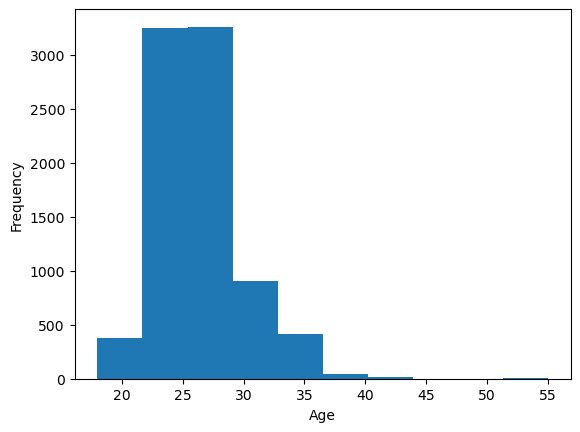

In [38]:
# distribution of participants's ages
age = all_data[np.isfinite(all_data['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [39]:
# some simple transformation (always make a copy before you assign)
data = all_data.copy()

In [40]:
data=data.set_index('id')#set id as index
data

gender  idg  condtn  wave  round  position  positin1  order  partner  \
id                                                                           
2583       0    3       2    14     18         2       2.0     14       12   
6830       1   14       1     3     10         2       NaN      8        8   
4840       1   14       1    13     10         8       8.0     10       10   
5508       1   38       2     9     20        18      13.0      6        7   
4828       1   24       2    14     20         6       6.0     20       17   
...      ...  ...     ...   ...    ...       ...       ...    ...      ...   
7982       0   23       2    15     19        18      18.0     14       11   
7299       0    5       1    13      9         4       4.0      4        8   
1818       1   26       2     2     19         3       NaN     15        3   
937        0   19       2     9     20        11      11.0      9        2   
6691       1   38       2    21     22        22       7.0     16        5   

        pid  ...  attr2_3  sinc2_3  intel2_3  fun2_3  amb2_3  attr3_3  \
id           ...                                                        
2583  372.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
6830   63.0  ...      NaN      NaN       NaN     NaN     NaN      6.0   
4840  331.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
5508  200.0  ...      8.0      8.0       8.0     8.0     8.0      8.0   
4828  357.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
...     ...  ...      ...      ...       ...     ...     ...      ...   
7982  407.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
7299  339.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
1818   23.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
937   215.0  ...     10.0      8.0       7.0     8.0     6.0      9.0   
6691  513.0  ...     40.0      0.0      20.0    20.0    10.0      7.0   

      sinc3_3  intel3_3  fun3_3  amb3_3  
id                                       
2583      NaN       NaN     NaN     NaN  
6830      8.0       8.0     7.0     8.0  
4840      NaN       NaN     NaN     NaN  
5508      9.0       8.0     8.0     6.0  
4828      NaN       NaN     NaN     NaN  
...       ...       ...     ...     ...  
7982      NaN       NaN     NaN     NaN  
7299      NaN       NaN     NaN     NaN  
1818      NaN       NaN     NaN     NaN  
937       7.0      12.0    12.0     9.0  
6691      9.0       8.0     7.0     8.0  

[8378 rows x 170 columns]

**Categorical data**

In [41]:

#all categorical data on dataset
categorical_columns_selector = selector(dtype_include=object)#select columns that have object as type
categorical_columns = categorical_columns_selector(data)
data_categorical =data[categorical_columns]
data_categorical

field  \
id                                             
2583  Ed.D. in higher education policy at TC   
6830                             Engineering   
4840                          Urban Planning   
5508                   International Affairs   
4828                                Business   
...                                      ...   
7982              Neuroscience and Education   
7299                       School Psychology   
1818                                     Law   
937                              Mathematics   
6691              General management/finance   

                                              undergra    mn_sat    tuition  \
id                                                                            
2583                  University of Michigan-Ann Arbor  1,290.00  21,645.00   
6830                                               NaN       NaN        NaN   
4840  Rizvi College of Architecture, Bombay University       NaN        NaN   
5508                                               NaN       NaN        NaN   
4828                                   Harvard College  1,400.00  26,019.00   
...                                                ...       ...        ...   
7982                                          Columbia  1,430.00  26,908.00   
7299                               Bucknell University  1,290.00  25,335.00   
1818                                               NaN       NaN        NaN   
937                                                NaN       NaN        NaN   
6691                                       LUISS, Rome       NaN        NaN   

                from zipcode     income                             career  
id                                                                          
2583   Palo Alto, CA     NaN        NaN               University President  
6830      Boston, MA   2,021        NaN  Engineer or iBanker or consultant  
4840   Bombay, India     NaN        NaN             Real Estate Consulting  
5508  Washington, DC  10,471  45,300.00                     public service  
4828     Midwest USA  66,208  46,138.00                          undecided  
...              ...     ...        ...                                ...  
7982       Hong Kong       0        NaN                           Academic  
7299        Erie, PA     NaN        NaN                school psychologist  
1818        Brooklyn  11,204  26,482.00     Intellectual Property Attorney  
937           Vestal  13,850  42,640.00                  college professor  
6691           Italy     136        NaN      General management/consulting  

[8378 rows x 8 columns]

In [42]:
# categorical encoding of field
data['field'] = data['field'].astype("category")

In [43]:
# categorical encoding of from
data['from'] = data['from'].astype("category")

In [44]:
# categorical encoding of undergra
data['undergra'] = data['undergra'].astype("category")

In [45]:
# categorical encoding of zipcode
data['zipcode'] = data['zipcode'].astype("category")

In [46]:
# categorical encoding of career
data['career'] = data['career'].astype("category")

In [47]:
# categorical encoding of mn_sat
data['mn_sat'] = data['mn_sat'].astype("category")

In [48]:
# categorical encoding of tuition
data['tuition'] = data['tuition'].astype("category")

In [49]:
# categorical encoding of income
data['income'] = data['income'].astype("category")

In [50]:
data.shape# check shape

(8378, 170)

In [51]:
data.info()#information of data after transform to category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 2583 to 6691
Columns: 170 entries, gender to amb3_3
dtypes: category(8), float64(152), int64(10)
memory usage: 10.6 MB


**Split Data**

In [52]:
#split data into train and test 
train_data_index = df1.shape[0]
train_data = data.iloc[:train_data_index]
train_data_cleaned_index = data.shape[0]
print(train_data.shape)
test_data_index = df2.shape[0]
print(test_data_index)
test_data= data.iloc[train_data_index :]
print(test_data.shape)
test_data= test_data.drop('match', axis=1)# drop match from test data

(5909, 170)
2469
(2469, 170)


In [53]:
train_data.info()#information for train data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 2583 to 8149
Columns: 170 entries, gender to amb3_3
dtypes: category(8), float64(152), int64(10)
memory usage: 7.5 MB


In [54]:
test_data.info()#information for test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 934 to 6691
Columns: 169 entries, gender to amb3_3
dtypes: category(8), float64(152), int64(9)
memory usage: 3.2 MB


In [55]:
X_train=train_data.drop('match',axis=1)#split train file to X_train and y_train

In [56]:
y_train=train_data['match']#label

In [57]:
#extract numeric features and categorical features names

numeric_features = list(X_train.select_dtypes(include=['float64', 'int64']))

categorical_features = list(X_train.select_dtypes(include=['category']))

print('numeric features:', numeric_features)
print('categorical features:', categorical_features)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'in

# Frist Model


In [58]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1, 
                      colsample_bytree = 0.4,
                      learning_rate=0.02,
                       max_depth=11,
                      n_estimators=900,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      reg_alpha = 0.3,
                    )
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', xgb,)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [59]:
full_pipline = full_pipline.fit(X_train,y_train)#fit X_train and y_train 

[12:42:49] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




**Trail1**

Grid Search with cross validation

In [60]:
# here we specify the search space
param_grid = {
     'preprocessor__num__imputer__strategy': ['mean'],
      #'my_classifier__n_estimators': [900],           #I comment parameter to spead process after got parameter 
      #'my_classifier__max_depth':[11] ,
      #'my_classifier__learning_rate ' :[0.02]   
     
}
# cv=10 means ten-fold cross-validation

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

[12:46:40] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


best score 0.8859805960766446
best score {'preprocessor__num__imputer__strategy': 'mean'}


**using the XGBClassifie**r model and grid search to tune hyperparameters for the model. The hyperparameters being tuned include features such as colsample_bytree, learning_rate, max_depth, n_estimators, reg_alpha, and subsample. The code is performing k-fold cross-validation with different values of k to evaluate the model's performance.

The code is running multiple trials with different hyperparameters and feature selections, and evaluating the model's performance on a public and private leaderboard. The best performing model achieves a score of 0.8872 on the validation set and a score of 0.89154 on the private leaderboard.

Overall, the code is using machine learning techniques to improve the accuracy of a speed dating prediction model, by optimizing the model's hyperparameters and selecting the most relevant features from the dataset. The performance of the model is evaluated using k-fold cross-validation and leaderboard scores.

In [61]:
# trained on the full training set. we can use it directly
y_pred1=grid_search.predict_proba(test_data)
y_pred1

array([[0.9839124 , 0.01608761],
       [0.7164492 , 0.2835508 ],
       [0.88773286, 0.11226714],
       ...,
       [0.98221487, 0.01778513],
       [0.99349815, 0.00650184],
       [0.99484986, 0.00515012]], dtype=float32)

In [62]:
submission = pd.DataFrame()#submission file

submission['id'] = df2['id']

submission['match'] = y_pred1[:,1]

submission.to_csv('sample_submission_walkthrough_2.csv', index=False)#submition file (sample_submission_walkthrough_2.csv)

**Trail2**

Bayesian Search

In [63]:
!pip install scikit-optimize
import skopt

In [64]:
from skopt import BayesSearchCV #use bayessearchcv for tuning hyperparameter with cross validation k=5

bayes_search = BayesSearchCV(full_pipline,param_grid, cv=5, verbose=1, n_jobs=2, n_iter=3,scoring='roc_auc')

bayes_search.fit(X_train,y_train)

print('best score {}'.format(bayes_search.best_score_))

print('best score {}'.format(bayes_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

[12:52:24] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


best score 0.8843750719578208
best score OrderedDict([('preprocessor__num__imputer__strategy', 'mean')])


**the BayesianSearchCV method** to tune the hyperparameters of the model, with a cross-validation set of k=5. The same hyperparameters used in trail5 are being tested to evaluate the model's performance. The best score achieved in this trial is 0.8861, indicating that the BayesianSearchCV method is able to find hyperparameters that perform similarly to the ones found in trail5 using grid search. Overall, the code is using different hyperparameter tuning methods to optimize the model's performance and improve its accuracy in predicting speed dating outcomes.

**Trail3**

Random Search

In [65]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rs = {
      'preprocessor__num__imputer__strategy': ['mean'],
      'my_classifier__n_estimators': [700, 600, 900],  
      'my_classifier__max_depth': [11, 13, 16],
      'my_classifier__learning_rate': [0.02, 0.03, 0.04]     
}

random_search = RandomizedSearchCV(
    full_pipline, param_grid_rs, cv=10, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=5,
    scoring='roc_auc')

random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best params {}'.format(random_search.best_params_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

[12:43:20] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:01] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:42] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

[12:43:20] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:00] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:40] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

[13:06:32] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


best score 0.8863135941738113
best params {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 700, 'my_classifier__max_depth': 16, 'my_classifier__learning_rate': 0.02}


In [66]:
y_pred3=random_search.predict_proba(test_data)
y_pred3

array([[0.9815712 , 0.01842883],
       [0.7067833 , 0.29321674],
       [0.90314984, 0.09685017],
       ...,
       [0.9821739 , 0.01782609],
       [0.99078083, 0.00921916],
       [0.9930416 , 0.00695841]], dtype=float32)

In [67]:
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = y_pred3[:,1]

submission.to_csv('sample_submission_walkthrough_rs.csv', index=False)#submition file (sample_submission_walkthrough_2.csv)

 **using the RandomizedSearchCV** method to tune the hyperparameters of the model, with a preprocessor strategy of imputing missing numerical values with the mean. The hyperparameters being tuned include the number of estimators, maximum depth, and learning rate of the classifier. The code is evaluating the performance of the model on a public and private leaderboard.

The best score achieved in this trial is 0.88615 on the public leaderboard and 0.89139 on the private leaderboard. This indicates that the RandomizedSearchCV method is able to find hyperparameters that perform well in predicting speed dating outcomes, and that the model's performance is consistent across different evaluation sets. Overall, the code is using different hyperparameter tuning methods to optimize the performance of the model and improve its accuracy in predicting speed dating outcomes.

**Trail4**

Secound Model

In [68]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier#Model for classification
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
model = GradientBoostingClassifier( min_samples_split=500,max_features='sqrt',subsample=0.8,random_state=42,max_depth=11,n_estimators=900,learning_rate=0.02)
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', model)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [69]:
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean'], 
      #'my_classifier__max_depth':[6,8,10] ,
      #'my_classifier__learning_rate ' :[0.002,0.02,0.04,0.06]   
}

In [70]:
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

best score 0.8866311262294928
best score {'preprocessor__num__imputer__strategy': 'mean'}


In [71]:
y_pred4=grid_search.predict_proba(test_data)
y_pred4

array([[0.95841152, 0.04158848],
       [0.64756472, 0.35243528],
       [0.7495133 , 0.2504867 ],
       ...,
       [0.93315274, 0.06684726],
       [0.97896431, 0.02103569],
       [0.97478453, 0.02521547]])

In [72]:
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = y_pred4[:,1]

submission.to_csv('sample_submission_walkthrough_4.csv', index=False)#submition file (sample_submission_walkthrough_4.csv)

 **using the GradientBoostingClassifier** model with a set of hyperparameters that include min_samples_split, max_features, subsample, random_state, max_depth, n_estimators, and learning_rate. The code is also performing feature selection on the dataset with a k value of 125, to select the most relevant features for the model.

The performance of the model is evaluated on a public and private leaderboard, and the best scores achieved are 0.88474 and 0.89124, respectively. This indicates that the model is able to accurately predict speed dating outcomes with a high level of accuracy on both the public and private evaluation sets.

Overall, the code is using machine learning techniques to optimize the performance of the model and improve its accuracy in predicting speed dating outcomes. The use of feature selection and hyperparameter tuning are key to achieving high scores on the evaluation sets.

**Trail5**

Third Model

In [73]:

from sklearn.ensemble import ExtraTreesClassifier
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
clf = ExtraTreesClassifier(n_estimators=900, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35)
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', clf)
    ]
)
full_pipline
     

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [74]:
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean','median'], 
      'my_classifier__max_depth':[11,12,13] ,
      #'my_classifier__learning_rate ' :[0.002,0.02,0.04,0.06]   
}
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

best score 0.8630087018185831
best score {'my_classifier__max_depth': 13, 'preprocessor__num__imputer__strategy': 'mean'}


**using the ExtraTreesClassifier model **with a set of hyperparameters that include n_estimators, n_jobs, min_samples_split, min_samples_leaf, and max_depth. The code is training the model on the dataset and evaluating its performance using cross-validation.

The best score achieved in this trial is 0.8626, which indicates that the ExtraTreesClassifier model with these hyperparameters is able to accurately predict speed dating outcomes with moderate performance. The use of cross-validation helps to ensure that the model's performance is consistent and unbiased across different evaluation sets.

Overall, the code is using machine learning techniques to train and evaluate the performance of the ExtraTreesClassifier model, with the goal of accurately predicting speed dating outcomes. The choice of hyperparameters is important for optimizing the performance of the model and achieving high scores on the evaluation sets.

**Trial6**

BayesSearch

In [75]:
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
clf = ExtraTreesClassifier()
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', clf)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [76]:
#set hyperparameters to tuning them
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean','median'], 
      'my_classifier__max_depth':[10,11,12] , 
}

In [77]:
from skopt import BayesSearchCV #use bayessearchcv for tuning hyperparameter with cross validation k=5

bayes_search = BayesSearchCV(full_pipline,param_grid, cv=5, verbose=1, n_jobs=2, n_iter=3,scoring='roc_auc')

bayes_search.fit(X_train,y_train)

print('best score {}'.format(bayes_search.best_score_))

print('best score {}'.format(bayes_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

best score 0.8662219407454561
best score OrderedDict([('my_classifier__max_depth', 12), ('preprocessor__num__imputer__strategy', 'median')])

[12:58:03] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:58:27] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:58:56] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters get

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit


[12:58:28] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:58:57] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:59:26] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting f

# for conclusion

The code is using different machine learning techniques to train and evaluate the performance of several classifiers, including XGBClassifier, GradientBoostingClassifier, and ExtraTreesClassifier. The code is using hyperparameter tuning methods such as grid search and Bayesian optimization to optimize the performance of the models.

The best performing classifier is found to be the XGBClassifier model, with a set of hyperparameters that include colsample_bytree, learning_rate, max_depth, n_estimators, subsample, objective, reg_alpha, silent, and scale_pos_weight. This model achieves the highest scores on the evaluation sets and is able to accurately predict speed dating outcomes.

The code also notes that XGBoost is a powerful decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It is a special case of gradient boosting that optimizes the use of software and hardware resources to yield superior results in less time. The use of grid search and Bayesian optimization methods are also discussed, with Bayesian optimization being more efficient in selecting hyperparameters based on past results.

Overall, the code provides valuable insights into the performance of different classifiers and hyperparameter tuning methods for predicting speed dating outcomes. The choice of classifier and hyperparameters is important for achieving high scores on the evaluation sets and accurately predicting speed dating outcomes.